이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [37]:
# 본인이 필요한 라이브러리 추가

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


# 1. KNN 과제

## 1. 데이터 로드

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


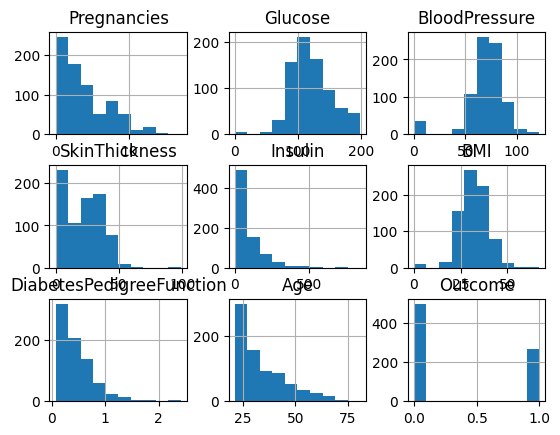

In [8]:
df.hist()
plt.show()

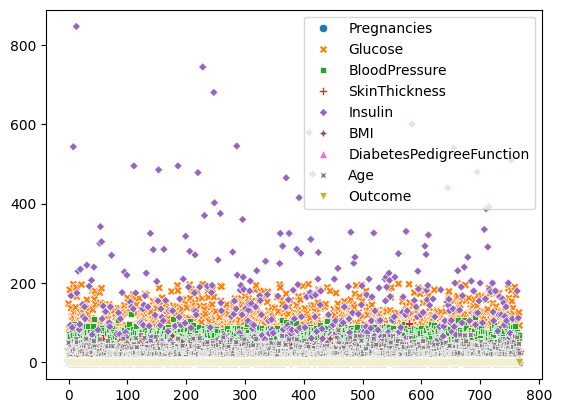

In [9]:
sns.scatterplot(data=df)
plt.show()

## 3. KNN 구현 & 파라미터 튜닝


In [11]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier()

In [17]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


## 4. 평가

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6948051948051948
Confusion Matrix:
 [[77 22]
 [25 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77        99
           1       0.58      0.55      0.56        55

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



---
# 2. K-Means 과제

## 1. 데이터 로드

In [54]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 2. 데이터 전처리/EDA

In [55]:
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)

df['status_published'] = pd.to_datetime(df['status_published'])

df = pd.get_dummies(df, columns=['status_type'], drop_first=True)

print(df.describe())

                    status_published  num_reactions  num_comments  \
count                           7050    7050.000000   7050.000000   
mean   2016-11-20 05:13:52.672340224     230.117163    224.356028   
min              2012-07-15 02:51:00       0.000000      0.000000   
25%              2016-03-15 16:52:45      17.000000      0.000000   
50%              2017-11-18 01:19:00      59.500000      4.000000   
75%              2018-03-09 05:26:45     219.000000     23.000000   
max              2018-06-13 01:12:00    4710.000000  20990.000000   
std                              NaN     462.625309    889.636820   

        num_shares    num_likes    num_loves     num_wows    num_hahas  \
count  7050.000000  7050.000000  7050.000000  7050.000000  7050.000000   
mean     40.022553   215.043121    12.728652     1.289362     0.696454   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    17.000000     0.000000     0.000000     0.000000   
50%     

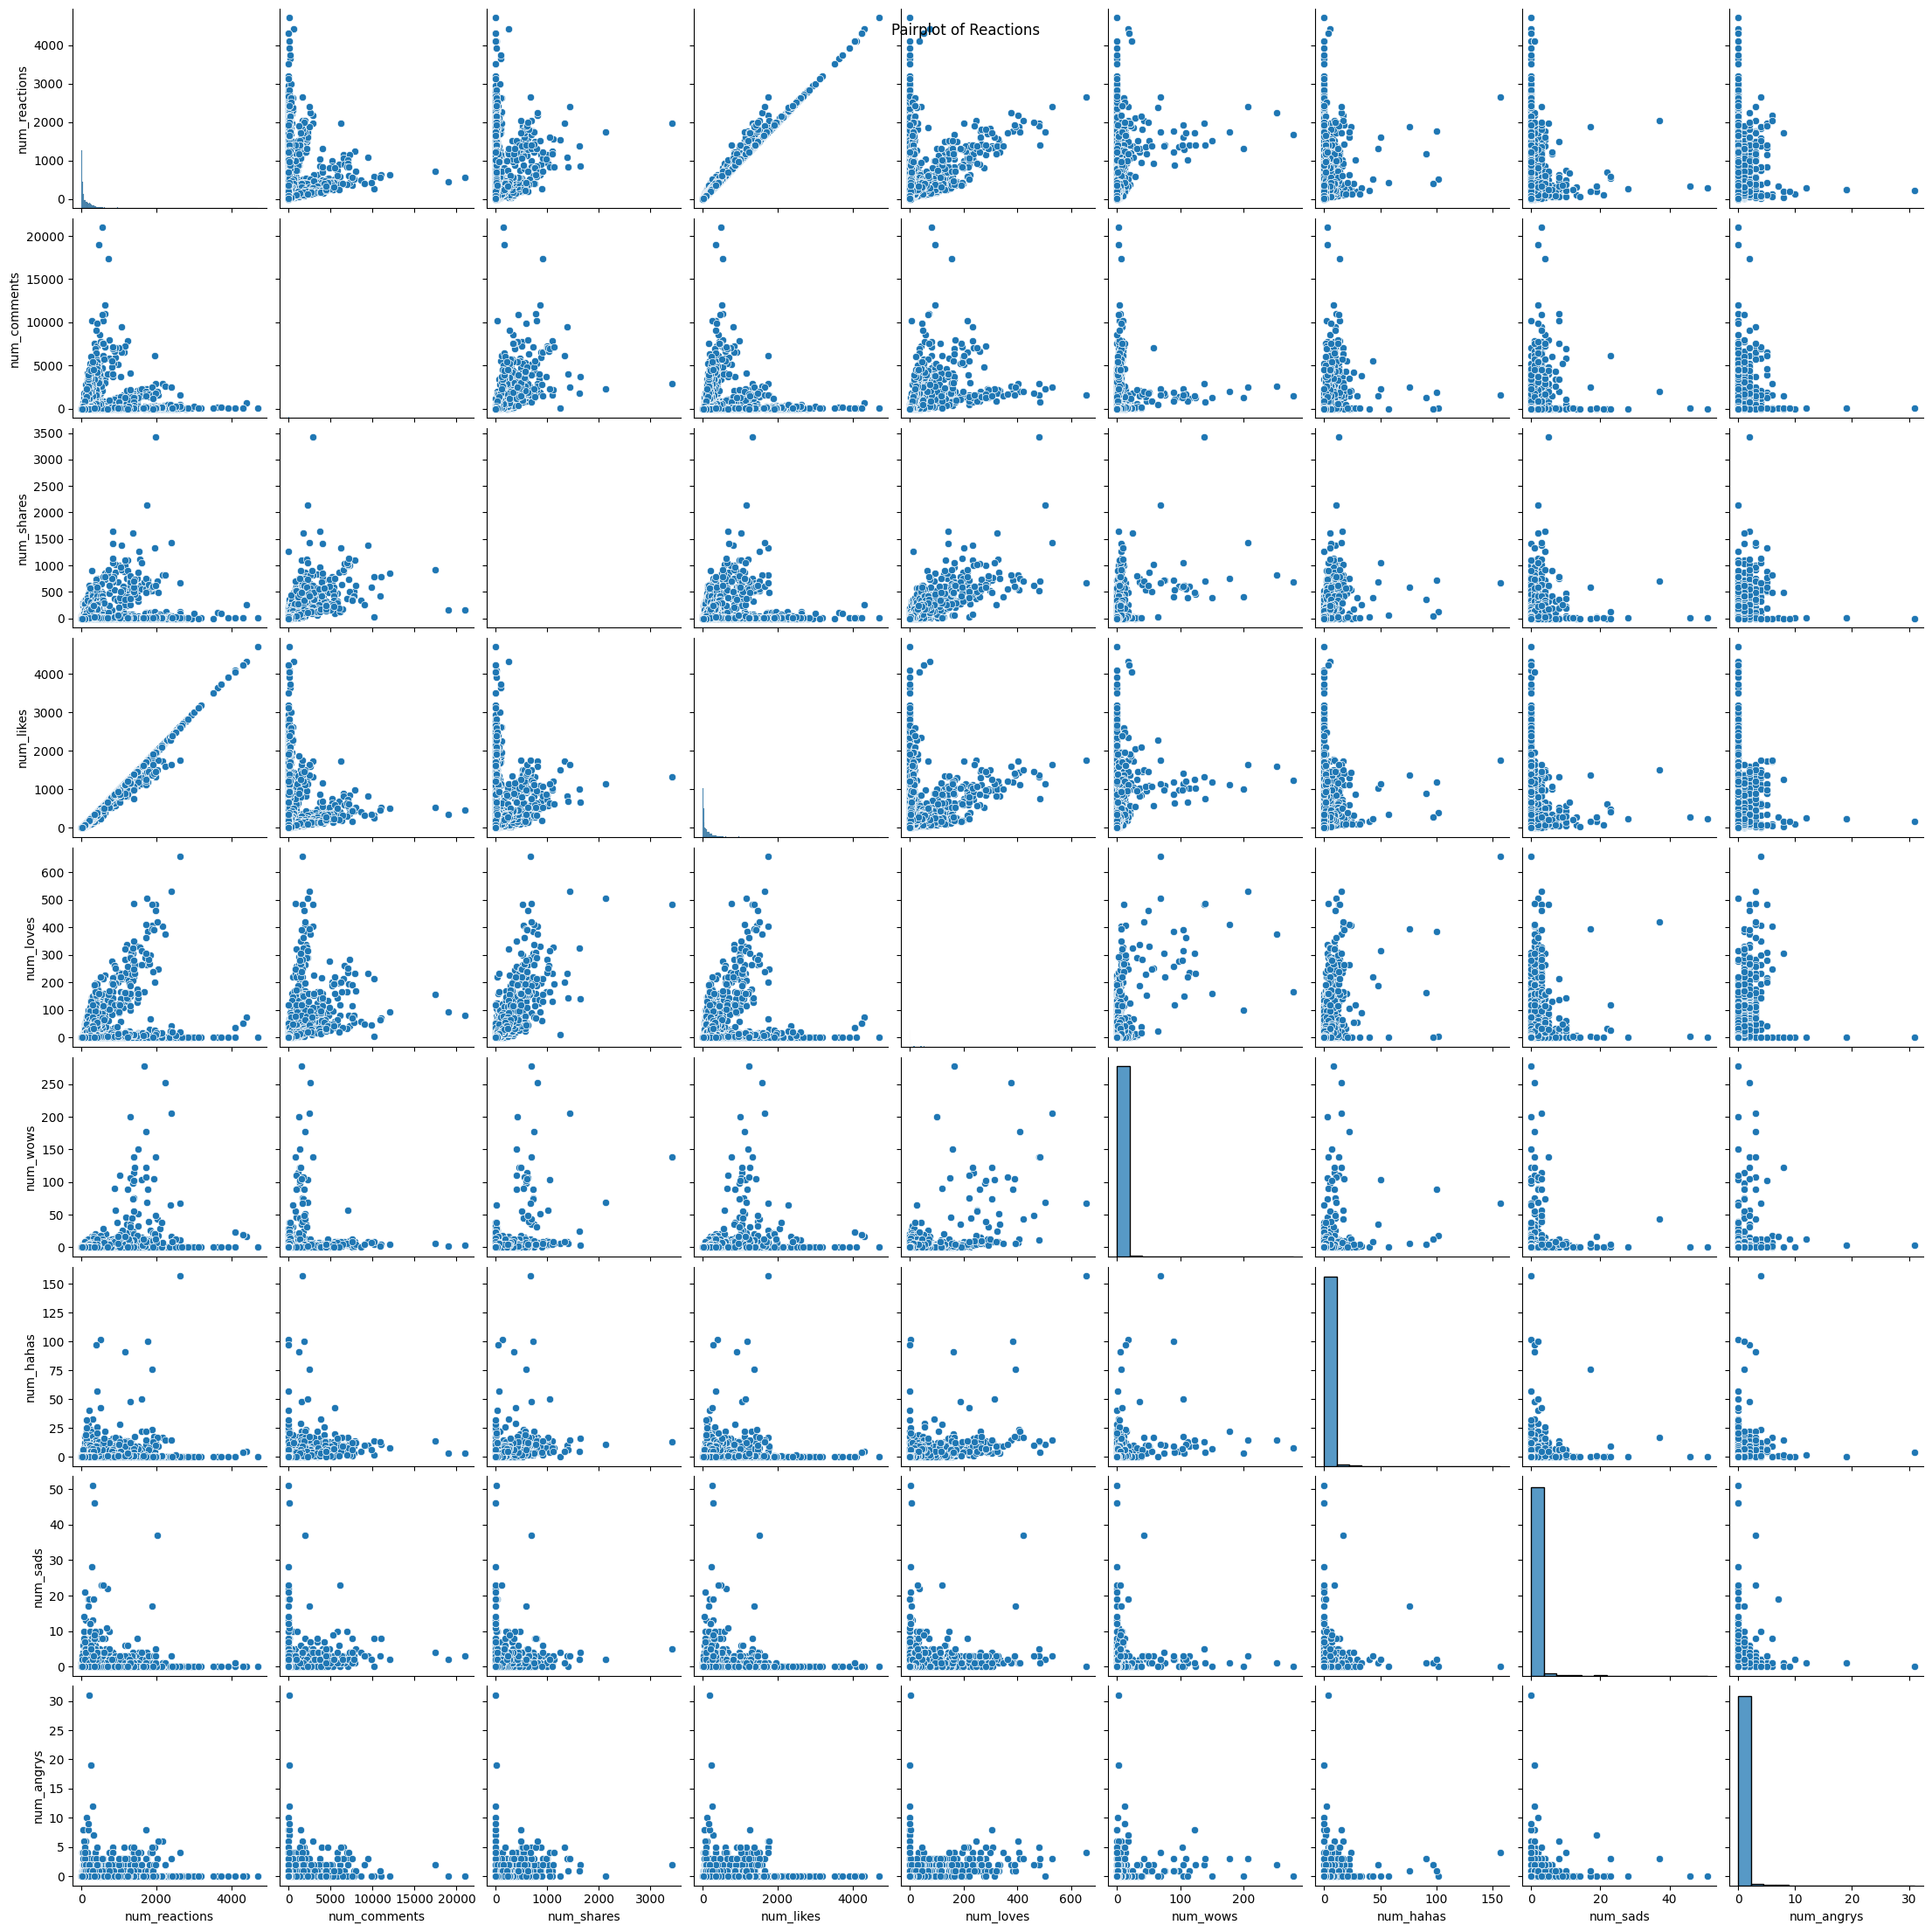

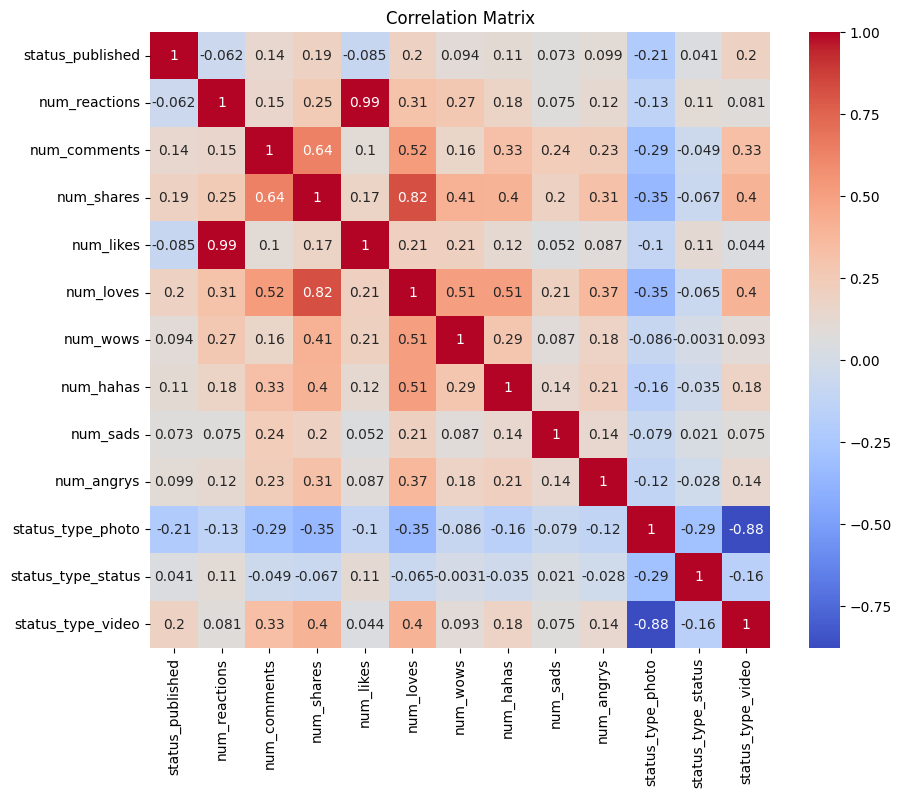

In [50]:
sns.pairplot(df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']])
plt.suptitle('Pairplot of Reactions')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3. K-Means 구현 & 파라미터 튜닝

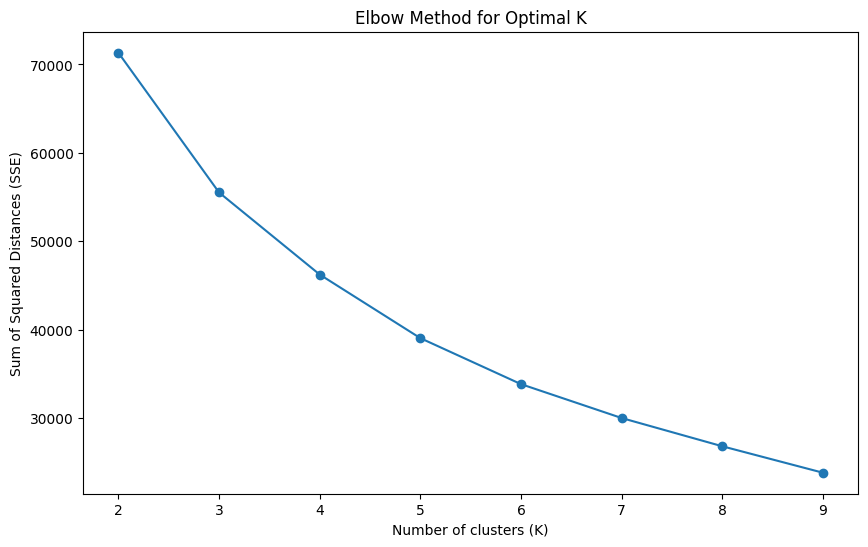

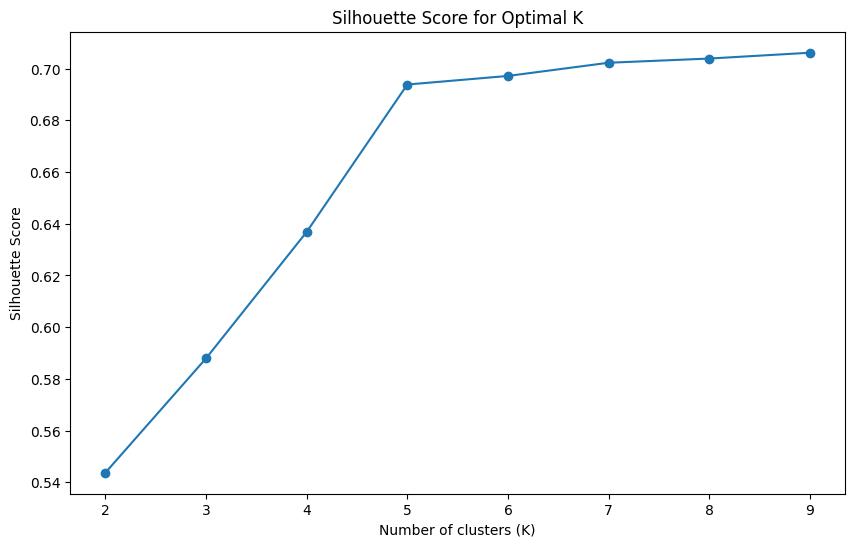

In [61]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['status_id', 'status_published'], axis=1))

sse = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters

## 4. 평가

Cluster Centers:
 [[-0.1136944  -0.23438679 -0.2870604  -0.08886523 -0.28321784 -0.07141791
  -0.13461911 -0.06493365 -0.1039386   0.78080474 -0.23366611 -0.70349907
  -0.61382404]
 [ 0.18088316  0.37289982  0.45670138  0.14138096  0.45058803  0.11362298
   0.21417351  0.10330678  0.16536207 -1.24222849  0.37175325  1.11923832
   0.97656901]]
Cluster
0    4329
1    2721
Name: count, dtype: int64


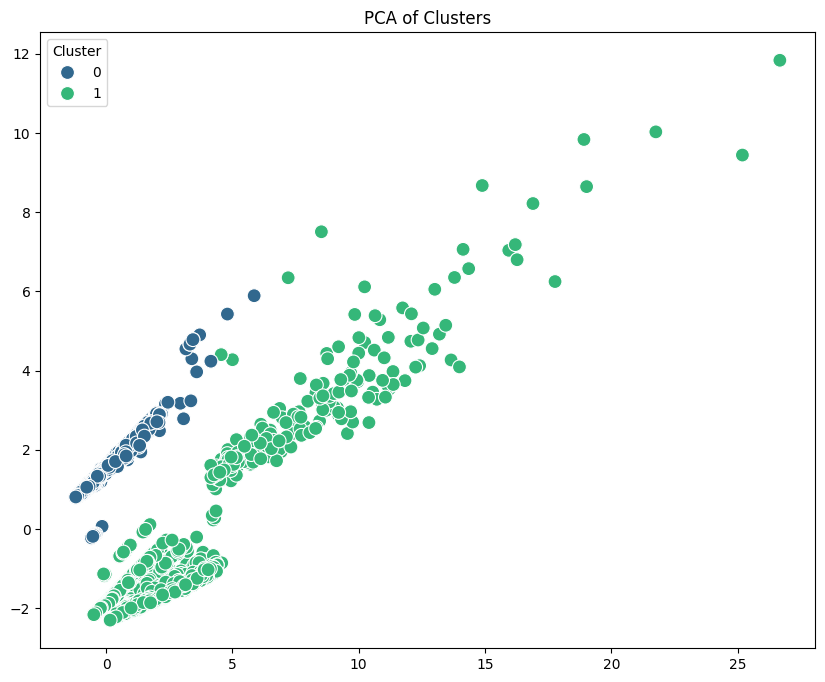

In [62]:
# 1. 각 클러스터의 중심 확인
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:\n", cluster_centers)

# 2. 클러스터별 데이터 포인트 수
print(df['Cluster'].value_counts())

# 3. PCA를 사용한 2D 시각화
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title('PCA of Clusters')
plt.show()

In [63]:
cluster_means = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_means)

final_silhouette_score = silhouette_score(scaled_data, clusters)
print(f"Final Silhouette Score: {final_silhouette_score}")

         num_reactions  num_comments  num_shares   num_likes  num_loves  \
Cluster                                                                   
0           177.522985     15.851698    2.248094  175.103488   1.408408   
1           313.792356    556.077913  100.120176  278.585447  30.738699   

         num_wows  num_hahas  num_sads  num_angrys  status_type_photo  \
Cluster                                                                 
0        0.666667   0.163779  0.139986    0.037653           0.989374   
1        2.280044   1.543918  0.408673    0.233370           0.001838   

         status_type_status  status_type_video  
Cluster                                         
0                  0.000000           0.000000  
1                  0.134142           0.857773  
Final Silhouette Score: 0.5437326322654406
